In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.3.5'

In [3]:
pd.options.display.max_rows

60

In [4]:
lst = [6, 34, 45]
lst = pd.Series(lst, index=['A','B','C'])
print(lst['B'])
lst

34


A     6
B    34
C    45
dtype: int64

In [5]:
dict = {
    'Day1':420,
    'Day2':330,
    'Day3':540
}
lst = pd.Series(dict, index=['Day1','Day2'])
lst

Day1    420
Day2    330
dtype: int64

In [6]:
table = {
    'Cars':['Bmw','Volvo','Audi'],
    'Customers':[150000,90000,170000]
}
df = pd.DataFrame(table,index=[1,2,3])
df

,Cars,Customers
1,Bmw,150000
2,Volvo,90000
3,Audi,170000


In [7]:
df.loc[1]

Cars            Bmw
Customers    150000
Name: 1, dtype: object

In [8]:
print(df.to_string())

    Cars  Customers
1    Bmw     150000
2  Volvo      90000
3   Audi     170000


In [9]:
#JSON
data = {
  "Duration":{
    "0":60,
    "1":60,
    "2":60,
    "3":45,
    "4":45,
    "5":60
  },
  "Pulse":{
    "0":110,
    "1":117,
    "2":103,
    "3":109,
    "4":117,
    "5":102
  },
  "Maxpulse":{
    "0":130,
    "1":145,
    "2":135,
    "3":175,
    "4":148,
    "5":127
  },
  "Calories":{
    "0":409,
    "1":479,
    "2":340,
    "3":282,
    "4":406,
    "5":300
  }
}

df = pd.DataFrame(data)

print(df) 

   Duration  Pulse  Maxpulse  Calories
0        60    110       130       409
1        60    117       145       479
2        60    103       135       340
3        45    109       175       282
4        45    117       148       406
5        60    102       127       300


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Duration  6 non-null      int64
 1   Pulse     6 non-null      int64
 2   Maxpulse  6 non-null      int64
 3   Calories  6 non-null      int64
dtypes: int64(4)
memory usage: 240.0+ bytes


In [11]:
df.dropna(inplace=True)
df.fillna(140, inplace=True)

In [12]:
# Filling with mean, mode or median
x = df['Pulse'].mean()
df['Pulse'].fillna(x,inplace=True)

In [13]:
df['Date'] = ['12/12/2022','14/12/2022','14/12/2022','12/12/2022','12/12/2022',pd.NA]
df['Date'] = pd.to_datetime(df['Date'])
df

,Duration,Pulse,Maxpulse,Calories,Date
0,60,110,130,409,2022-12-12
1,60,117,145,479,2022-12-14
2,60,103,135,340,2022-12-14
3,45,109,175,282,2022-12-12
4,45,117,148,406,2022-12-12
5,60,102,127,300,NaT


In [14]:
df.dropna(subset=['Date'], inplace=True)
df

,Duration,Pulse,Maxpulse,Calories,Date
0,60,110,130,409,2022-12-12
1,60,117,145,479,2022-12-14
2,60,103,135,340,2022-12-14
3,45,109,175,282,2022-12-12
4,45,117,148,406,2022-12-12


In [15]:
df.loc['3','Calories'] = 145
df

,Duration,Pulse,Maxpulse,Calories,Date
0,60,110,130,409,2022-12-12
1,60,117,145,479,2022-12-14
2,60,103,135,340,2022-12-14
3,45,109,175,145,2022-12-12
4,45,117,148,406,2022-12-12


In [16]:
df.drop(df.tail(1).index,inplace=True)
df

,Duration,Pulse,Maxpulse,Calories,Date
0,60,110,130,409,2022-12-12
1,60,117,145,479,2022-12-14
2,60,103,135,340,2022-12-14
3,45,109,175,145,2022-12-12


In [17]:
for x in df.index:
  if df.loc[x,'Maxpulse']>135:
    df[x,'Maxpulse']=135
df

,Duration,Pulse,Maxpulse,Calories,Date,"(1, Maxpulse)","(3, Maxpulse)"
0,60,110,130,409,2022-12-12,135,135
1,60,117,145,479,2022-12-14,135,135
2,60,103,135,340,2022-12-14,135,135
3,45,109,175,145,2022-12-12,135,135


In [18]:
#Removing last column
df=df.iloc[:,:-1]
df

,Duration,Pulse,Maxpulse,Calories,Date,"(1, Maxpulse)"
0,60,110,130,409,2022-12-12,135
1,60,117,145,479,2022-12-14,135
2,60,103,135,340,2022-12-14,135
3,45,109,175,145,2022-12-12,135


In [19]:
# Index is string need to convert to int
print(df.index.dtype)
df.index = df.index.astype(int)
print(df.index.dtype)

object
int64


In [20]:
for x in df.index:
  if df.loc[x,'Maxpulse']>135:
    df.loc[x,'Maxpulse']=135
df

,Duration,Pulse,Maxpulse,Calories,Date,"(1, Maxpulse)"
0,60,110,130,409,2022-12-12,135
1,60,117,135,479,2022-12-14,135
2,60,103,135,340,2022-12-14,135
3,45,109,135,145,2022-12-12,135


In [21]:
# Dealing with duplicates
df.duplicated()

0    False
1    False
2    False
3    False
dtype: bool

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.corr()

,Duration,Pulse,Maxpulse,Calories,"(1, Maxpulse)"
Duration,1.000000,0.087149,-0.333333,0.918883,NaN
Pulse,0.087149,1.000000,-0.029050,0.473106,NaN
Maxpulse,-0.333333,-0.029050,1.000000,-0.304749,NaN
Calories,0.918883,0.473106,-0.304749,1.000000,NaN
"(1, Maxpulse)",NaN,NaN,NaN,NaN,NaN


In [24]:
import matplotlib.pyplot as plt

In [25]:
df.drop('Date',inplace=True,axis=1)

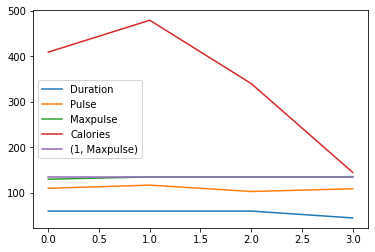

In [26]:
df.plot()
plt.show()

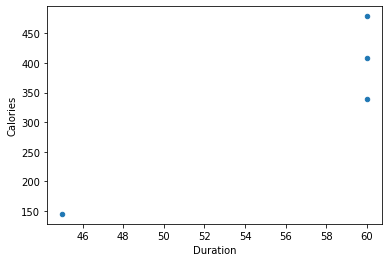

In [27]:
df.plot(kind='scatter',x='Duration',y='Calories')
plt.show()

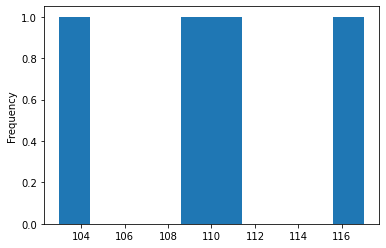

In [28]:
df['Pulse'].plot(kind='hist')
plt.show()

In [29]:
df.describe()

,Duration,Pulse,Maxpulse,Calories,"(1, Maxpulse)"
count,4.00,4.000000,4.00,4.000000,4.0
mean,56.25,109.750000,133.75,343.250000,135.0
std,7.50,5.737305,2.50,143.834106,0.0
min,45.00,103.000000,130.00,145.000000,135.0
25%,56.25,107.500000,133.75,291.250000,135.0
50%,60.00,109.500000,135.00,374.500000,135.0
75%,60.00,111.750000,135.00,426.500000,135.0
max,60.00,117.000000,135.00,479.000000,135.0


In [30]:
df

,Duration,Pulse,Maxpulse,Calories,"(1, Maxpulse)"
0,60,110,130,409,135
1,60,117,135,479,135
2,60,103,135,340,135
3,45,109,135,145,135


In [31]:
df.to_numpy()

array([[ 60, 110, 130, 409, 135],
       [ 60, 117, 135, 479, 135],
       [ 60, 103, 135, 340, 135],
       [ 45, 109, 135, 145, 135]])

In [32]:
df.T

,0,1,2,3
Duration,60,60,60,45
Pulse,110,117,103,109
Maxpulse,130,135,135,135
Calories,409,479,340,145
"(1, Maxpulse)",135,135,135,135


In [35]:
df=df.iloc[:,0:4]
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409
1,60,117,135,479
2,60,103,135,340
3,45,109,135,145


In [36]:
df.sort_index(axis=1)

,Calories,Duration,Maxpulse,Pulse
0,409,60,130,110
1,479,60,135,117
2,340,60,135,103
3,145,45,135,109


In [37]:
df.sort_values(by='Calories', ascending=False).loc[:,['Duration','Calories']]

,Duration,Calories
1,60,479
0,60,409
2,60,340
3,45,145


In [38]:
df[df['Calories']>300]

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409
1,60,117,135,479
2,60,103,135,340


In [39]:
df[df['Pulse'].isin([117,110])]

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409
1,60,117,135,479


In [40]:
ser = pd.Series([2,3,4,5,6,7,8,9],index=pd.date_range('20220501',periods=8))
ser

2022-05-01    2
2022-05-02    3
2022-05-03    4
2022-05-04    5
2022-05-05    6
2022-05-06    7
2022-05-07    8
2022-05-08    9
Freq: D, dtype: int64

In [41]:
df = ser.to_frame(name='Price')
df

,Price
2022-05-01,2
2022-05-02,3
2022-05-03,4
2022-05-04,5
2022-05-05,6
2022-05-06,7
2022-05-07,8
2022-05-08,9


In [42]:
df.iat[2,0]

4

In [43]:
df['Price^2'] = pow(df['Price'],2)
df

,Price,Price^2
2022-05-01,2,4
2022-05-02,3,9
2022-05-03,4,16
2022-05-04,5,25
2022-05-05,6,36
2022-05-06,7,49
2022-05-07,8,64
2022-05-08,9,81


In [44]:
import numpy as np

In [45]:
df['Fives'] = np.array([5]*len(df))
df

,Price,Price^2,Fives
2022-05-01,2,4,5
2022-05-02,3,9,5
2022-05-03,4,16,5
2022-05-04,5,25,5
2022-05-05,6,36,5
2022-05-06,7,49,5
2022-05-07,8,64,5
2022-05-08,9,81,5


In [46]:
df['Sixes']=6
df

,Price,Price^2,Fives,Sixes
2022-05-01,2,4,5,6
2022-05-02,3,9,5,6
2022-05-03,4,16,5,6
2022-05-04,5,25,5,6
2022-05-05,6,36,5,6
2022-05-06,7,49,5,6
2022-05-07,8,64,5,6
2022-05-08,9,81,5,6


In [47]:
df.mean()

Price       5.5
Price^2    35.5
Fives       5.0
Sixes       6.0
dtype: float64

In [48]:
df.mean(axis=1)

2022-05-01     4.25
2022-05-02     5.75
2022-05-03     7.75
2022-05-04    10.25
2022-05-05    13.25
2022-05-06    16.75
2022-05-07    20.75
2022-05-08    25.25
Freq: D, dtype: float64

In [49]:
s1=[10,9,9,np.nan,6,5,4,np.nan]

In [50]:
df1=df.sub(s1,axis='index')
df1

,Price,Price^2,Fives,Sixes
2022-05-01,-8.0,-6.0,-5.0,-4.0
2022-05-02,-6.0,0.0,-4.0,-3.0
2022-05-03,-5.0,7.0,-4.0,-3.0
2022-05-04,NaN,NaN,NaN,NaN
2022-05-05,0.0,30.0,-1.0,0.0
2022-05-06,2.0,44.0,0.0,1.0
2022-05-07,4.0,60.0,1.0,2.0
2022-05-08,NaN,NaN,NaN,NaN


In [51]:
df1.apply(np.cumsum)

,Price,Price^2,Fives,Sixes
2022-05-01,-8.0,-6.0,-5.0,-4.0
2022-05-02,-14.0,-6.0,-9.0,-7.0
2022-05-03,-19.0,1.0,-13.0,-10.0
2022-05-04,NaN,NaN,NaN,NaN
2022-05-05,-19.0,31.0,-14.0,-10.0
2022-05-06,-17.0,75.0,-14.0,-9.0
2022-05-07,-13.0,135.0,-13.0,-7.0
2022-05-08,NaN,NaN,NaN,NaN


In [52]:
df1.apply(lambda x: x.max()-x.min())

Price      12.0
Price^2    66.0
Fives       6.0
Sixes       6.0
dtype: float64

In [54]:
df['Names'] = ['Alpha','beTha','gAMMA','OMEga','Delta','zeta','Delta','Delta']
df['Names'] = df['Names'].str.lower()
df

,Price,Price^2,Fives,Sixes,Names
2022-05-01,2,4,5,6,alpha
2022-05-02,3,9,5,6,betha
2022-05-03,4,16,5,6,gamma
2022-05-04,5,25,5,6,omega
2022-05-05,6,36,5,6,delta
2022-05-06,7,49,5,6,zeta
2022-05-07,8,64,5,6,delta
2022-05-08,9,81,5,6,delta


In [55]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.189876,-0.413847,-1.077519,0.896118
1,-0.835124,-0.589159,0.819861,-1.088514
2,-1.187791,0.795138,1.051318,-0.472891
3,-1.130737,-0.335966,-0.088072,-0.532049
4,-0.129034,-1.049658,0.280016,-1.350205
5,2.810027,1.547572,0.275073,-0.818723
6,-1.305585,1.918593,0.984816,0.073714
7,-0.313889,-2.463589,-1.138947,-0.775458
8,-1.240682,1.141181,-0.144555,-0.571935
9,0.735335,0.091331,0.718295,-0.343292


In [56]:
parts = [df[:3],df[3:7],df[7:]]
pd.concat(parts)

,0,1,2,3
0,0.189876,-0.413847,-1.077519,0.896118
1,-0.835124,-0.589159,0.819861,-1.088514
2,-1.187791,0.795138,1.051318,-0.472891
3,-1.130737,-0.335966,-0.088072,-0.532049
4,-0.129034,-1.049658,0.280016,-1.350205
5,2.810027,1.547572,0.275073,-0.818723
6,-1.305585,1.918593,0.984816,0.073714
7,-0.313889,-2.463589,-1.138947,-0.775458
8,-1.240682,1.141181,-0.144555,-0.571935
9,0.735335,0.091331,0.718295,-0.343292


In [57]:
left = pd.DataFrame({'key':['foo','foo','bar'],'lval':[1,2,2]})
right = pd.DataFrame({'key':['foo','bar','bar'],'rval':[2,2,1]})

In [58]:
print(left)
print(right)

   key  lval
0  foo     1
1  foo     2
2  bar     2
   key  rval
0  foo     2
1  bar     2
2  bar     1


In [59]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,2
1,foo,2,2
2,bar,2,2
3,bar,2,1


In [60]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,0.913128,0.953172
1,bar,one,0.352328,-2.588250
2,foo,two,-1.755308,-1.644946
3,bar,three,0.343298,-0.272922
4,foo,two,-0.693957,0.435741
5,bar,two,-1.257158,0.440187
6,foo,one,0.195868,-0.565551
7,foo,three,-1.004804,1.148072


In [61]:
df.groupby("A").sum()

,C,D
A,,
bar,-0.561533,-2.420985
foo,-2.345074,0.326487


In [62]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.352328 -2.588250
    three  0.343298 -0.272922
    two   -1.257158  0.440187
foo one    1.108996  0.387621
    three -1.004804  1.148072
    two   -2.449265 -1.209206

In [75]:
# Time series
rng = pd.date_range("1/1/2000",periods=200,freq='S')
ts = pd.Series(np.random.randint(0,500,len(rng)),index=rng)
ts

2000-01-01 00:00:00     93
2000-01-01 00:00:01    287
2000-01-01 00:00:02    459
2000-01-01 00:00:03    328
2000-01-01 00:00:04    175
                      ... 
2000-01-01 00:03:15    373
2000-01-01 00:03:16     87
2000-01-01 00:03:17    390
2000-01-01 00:03:18    432
2000-01-01 00:03:19    437
Freq: S, Length: 200, dtype: int64

In [76]:
ts.resample('1Min').sum()

2000-01-01 00:00:00    13765
2000-01-01 00:01:00    15092
2000-01-01 00:02:00    15084
2000-01-01 00:03:00     4964
Freq: T, dtype: int64

In [84]:
# Time zone
ts.tz_localize("CET")

2000-01-01 00:00:00+01:00     93
2000-01-01 00:00:01+01:00    287
2000-01-01 00:00:02+01:00    459
2000-01-01 00:00:03+01:00    328
2000-01-01 00:00:04+01:00    175
                            ... 
2000-01-01 00:03:15+01:00    373
2000-01-01 00:03:16+01:00     87
2000-01-01 00:03:17+01:00    390
2000-01-01 00:03:18+01:00    432
2000-01-01 00:03:19+01:00    437
Length: 200, dtype: int64

In [86]:
#Categorical data
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [88]:
df['grade'] = df['raw_grade'].astype('category')
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [89]:
df['grade'].cat.categories = ['very good', 'good', 'very bad']

In [90]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [93]:
# Reordering categories
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [94]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [98]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [99]:
# More plotting 
plt.close('all')

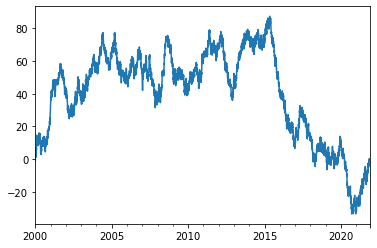

In [110]:
ts = pd.Series(np.random.randn(8000), index=pd.date_range('1/1/2000',periods=8000))
ts = ts.cumsum()
ts.plot()
plt.show()

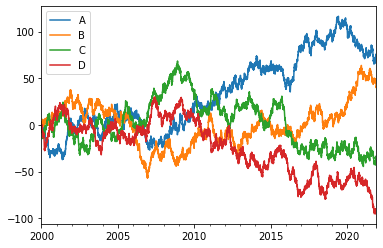

In [117]:
df = pd.DataFrame(np.random.randn(8000,4),index=ts.index,columns=['A','B','C','D'])
df = df.cumsum()
df.plot()
plt.legend(loc='best')

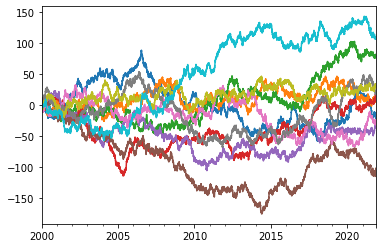

In [120]:
df = pd.DataFrame(np.random.randn(8000,10),index=ts.index)
df = df.cumsum()
df.plot(legend=None)
plt.show()